<h1><font color="#113D68" size=6>TINTOlib: Converting Tidy Data into Image for 2-Dimensional Convolutional Neural Networks</font></h1>

<h1><font color="#113D68" size=5>Template Classification Machine Learning problem with a CNN</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo-Cara</font><br>
<font color="#113D68" size=3>Raúl García-Castro</font><br>

</div>

---

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
More information about [Manuel Castillo-Cara](https://www.manuelcastillo.eu/)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
More information about [Raúl García-Castro](http://www.garcia-castro.com/)

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Index</font></h2>

* [0. Context](#section0)
* [1. Description](#section1)
    * [1.1. Main Features](#section11)
    * [1.2. Citation](#section12)
    * [1.3. Documentation and License](#section13)
* [2. Libraries](#section2)
    * [2.1. System setup](#section21)
    * [2.2. Invoke the libraries](#section22)
* [3. Data processing](#section3)
    * [3.1. TINTOlib methods](#section31)
    * [3.2. Read the dataset](#section32)
    * [3.3. Generate images](#section33)
    * [3.4. Read images](#section34)
* [4. Pre-modelling phase](#section4)
    * [4.1. Data curation](#section41)
    * [4.2. Resize Images](#section42)
    * [4.3. Iterators](#section43)
* [5. Modelling with CNN](#section5)
    * [5.1. CNN](#section51)
    * [5.2. Compile and fit](#section52)
* [6. Results](#section6)
    * [6.1. Train/Validation representation](#section61)
    * [6.2. Validation/Test evaluation](#section62)
    * [6.3. Sklearn metrics evaluation](#section63)

---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Context</font>

This is a tutorial on how to read the images created by TINTO and pass them to a very simple pretrained Convolutional Neural Network (CNN). The images must already be created by the TINTOlib software. See the documentation in GITHUB for how to create the images from tabular data.

Remember that when using CNN you can set the training to be done with GPUs to improve performance.

<div class="alert alert-block alert-info">

<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTOlib code in [GitHub](https://github.com/oeg-upm/TINTOlib)

<div class="alert alert-block alert-info">

<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTOlib documentation in [PyPI](https://tintolib.readthedocs.io/en/latest/installation.html)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

In [1]:
!pip freeze

absl-py==2.1.0
aiohttp==3.9.3
aiosignal==1.3.1
altgraph @ file:///AppleInternal/Library/BuildRoots/860631e9-c1c5-11ee-98ee-b6ef2fd8d87b/Library/Caches/com.apple.xbs/Sources/python3/altgraph-0.17.2-py2.py3-none-any.whl
anyio==4.3.0
appnope==0.1.3
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
astunparse==1.6.3
async-lru==2.0.4
async-timeout==4.0.3
attrs==23.2.0
Babel==2.14.0
beautifulsoup4==4.12.3
bleach==6.1.0
cachetools==5.3.2
certifi==2024.2.2
cffi==1.16.0
charset-normalizer==3.3.2
click==8.1.7
cmake==3.28.3
comm==0.2.1
contourpy==1.2.0
cycler==0.12.1
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
ecos==2.0.7rc2
entrypoints==0.4
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.1
filelock==3.13.1
flatbuffers==23.5.26
fonttools==4.47.2
fqdn==1.5.1
frozenlist==1.4.1
fsspec==2023.12.2
future @ file:///AppleInternal/Library/BuildRoots/860631e9-c1c5-11ee-98ee-b6ef2fd8d87b/Library/Caches/com.apple.xbs/Sources/python3/future-0.18.2-py3-none-any.w

<a id="section1"></a>
# <font color="#004D7F" size=6> 1. Description</font>

The growing interest in the use of algorithms-based machine learning for predictive tasks has generated a large and diverse development of algorithms. However, it is widely known that not all of these algorithms are adapted to efficient solutions in certain tidy data format datasets. For this reason, novel techniques are currently being developed to convert tidy data into images with the aim of using Convolutional Neural Networks (CNNs). TINTOlib offers the opportunity to convert tidy data into images through several techniques: TINTO, IGTD, REFINED, SuperTML, BarGraph, DistanceMatrix and Combination.

---
<a id="section11"></a>
# <font color="#004D7F" size=5> 1.1. Main Features</font>

- Supports all CSV data in **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
- For now, the algorithm converts tabular data for binary and multi-class classification problems into machine learning.
- Input data formats:
    - **Tabular files**: The input data could be in **[CSV](https://en.wikipedia.org/wiki/Comma-separated_values)**, taking into account the **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
    - **Dataframe***: The input data could be in **[Pandas Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)**, taking into account the **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
    - **Tidy Data**: The **target** (variable to be predicted) should be set as the last column of the dataset. Therefore, the first columns will be the features.
    - All data must be in numerical form. TINTOlib does not accept data in string or any other non-numeric format.
- Runs on **Linux**, **Windows** and **macOS** systems.
- Compatible with **[Python](https://www.python.org/)** 3.7 or higher.

---
<a id="section12"></a>
# <font color="#004D7F" size=5> 1.2. Citation</font>

**TINTOlib** is an python library that makes **Synthetic Images** from [Tidy Data](https://www.jstatsoft.org/article/view/v059i10) (also knows as **Tabular Data**).

**Citing TINTO**: If you used TINTO in your work, please cite the **[SoftwareX](https://doi.org/10.1016/j.softx.2023.101391)**:

```bib
@article{softwarex_TINTO,
    title = {TINTO: Converting Tidy Data into Image for Classification
            with 2-Dimensional Convolutional Neural Networks},
    journal = {SoftwareX},
    author = {Manuel Castillo-Cara and Reewos Talla-Chumpitaz and
              Raúl García-Castro and Luis Orozco-Barbosa},
    year = {2023},
    pages = {101391},
    issn = {2352-7110},
    doi = {https://doi.org/10.1016/j.softx.2023.101391}
}
```

And use-case developed in **[INFFUS Paper](https://doi.org/10.1016/j.inffus.2022.10.011)**

```bib
@article{inffus_TINTO,
    title = {A novel deep learning approach using blurring image
            techniques for Bluetooth-based indoor localisation},
    journal = {Information Fusion},
    author = {Reewos Talla-Chumpitaz and Manuel Castillo-Cara and
              Luis Orozco-Barbosa and Raúl García-Castro},
    volume = {91},
    pages = {173-186},
    year = {2023},
    issn = {1566-2535},
    doi = {https://doi.org/10.1016/j.inffus.2022.10.011}
}
```

---
<a id="section13"></a>
# <font color="#004D7F" size=5> 1.3. Documentation and License</font>

TINTOlib has a wide range of documentation on both GitHub and PyPI.

Moreover, TINTOlib is free and open software with Apache 2.0 license.

<div class="alert alert-block alert-info">

<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTOlib code in [GitHub](https://github.com/oeg-upm/TINTOlib)

<div class="alert alert-block alert-info">

<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTOlib documentation in [PyPI](https://tintolib.readthedocs.io/en/latest/installation.html)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6> 2. Libraries</font>

---
<a id="section21"></a>
# <font color="#004D7F" size=5> 2.1. System setup</font>

Before installing the libraries you must have the `mpi4py` package installed on the native (Linux) system. This link shows how to install it:
- [mpi4py in Linux](https://www.geeksforgeeks.org/how-to-install-python3-mpi4py-package-on-linux/)

For example, in Linux:

```
    sudo apt-get install python3
    sudo apt install python3-pip
    sudo apt install python3-mpi4py
```

If you are in Windows, Mac or, also, Linux, you can install from PyPI if you want:
```
    sudo pip3 install mpi4py
```

In [ ]:
!pip install TINTOlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.9 MB/s eta 0:00:00


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Note that you must **restart the kernel or the system** so that it can load the libraries.

Now, once you have installed `mpi4py` you can install the PyPI libraries and dependences.

In [ ]:
!pip install torchmetrics pytorch_lightning TINTOlib imblearn keras_preprocessing mpi4py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 40.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 996.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Note that you must **restart the kernel** so that it can load the libraries.

---
<a id="section22"></a>
# <font color="#004D7F" size=5> 2.2. Invoke the libraries</font>

The first thing we need to do is to declare the libraries

In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
#import cv2
import gc
import matplotlib.pyplot as plt
#import openslide
#from openslide.deepzoom import DeepZoomGenerator
import tifffile as tifi
import sklearn
import tensorflow as tf

from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import vgg16, vgg19, resnet50, mobilenet, inception_resnet_v2, densenet, inception_v3, xception, nasnet, ResNet152V2
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, InputLayer, LayerNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adamax

from imblearn.over_sampling import RandomOverSampler
#Models of TINTOlib
from TINTOlib.tinto import TINTO
from TINTOlib.supertml import SuperTML
from TINTOlib.igtd import IGTD
from TINTOlib.refined import REFINED
from TINTOlib.barGraph import BarGraph
from TINTOlib.distanceMatrix import DistanceMatrix
from TINTOlib.combination import Combination

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6> 3. Data processing</font>

---
<a id="section31"></a>
# <font color="#004D7F" size=5> 3.1. TINTOlib methods</font>

We prepare the declaration of the classes with the TINTOlib method we want to transform. Note that TINTOlib has several methods and we will have to choose one of them since each method generates different images.

In addition, we establish the paths where the dataset is located and also the folder where the images will be created.

In [ ]:
#Select the model and the parameters
problem_type = "supervised"
#image_model = REFINED(problem= problem_type,hcIterations=5) # No Funciona
image_model = TINTO(problem= problem_type,blur=True, pixels=30)
#image_model = IGTD(problem= problem_type)
#image_model = BarGraph(problem= problem_type)
#image_model = DistanceMatrix(problem= problem_type)
#image_model = Combination(problem= problem_type)

#Define the dataset path and the folder where the images will be saved
dataset_path = "DataSet_PreProcesado.csv"
images_folder = "images"

In [ ]:
#!rm -rf images
!mkdir images

<div class="alert alert-block alert-info">

<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all TINTOlib method in the [PyPI documentation](https://tintolib.readthedocs.io/en/latest/installation.html)

---
<a id="section32"></a>
# <font color="#004D7F" size=5> 3.2. Read the dataset</font>

In this part, we proceed to read the dataset according to the path specified above and also standardize the name that the target will have, in this case, it will be called _class_

In [ ]:
#Read CSV
import random
df=pd.read_csv(dataset_path,sep = '|')
columnas = list(df.columns)
canVarsIndependents = 25
porMuestra = 0.5
df = df.sample(frac=porMuestra)
columnas.remove('Flag_Target')
columnas.remove('Unnamed: 0')
varsIndependents = []
while(canVarsIndependents>0):
  varElegido = random.choice(columnas)
  varsIndependents.append(varElegido)
  columnas.remove(varElegido)
  canVarsIndependents -= 1

diagnosis_col = df['Flag_Target']
df = df[varsIndependents]
df['class'] = diagnosis_col
df = df.fillna(0)
df_input = df.fillna(0).copy()
df_input

,GNB,2_Premium,LIMA_MODERNA,A,B,Riesgo_Bajo,LIMA_SUR,Antiguedad_SSFF,NroTrxAgencia,1_Beyond,...,D,Superior,SaldoVEH,DIVORCIADO,ImporteTrxWeb,ImporteTrxCorresponsal,M,MontoOfertado,Edad,class
12195,0,0,0,0,0,0,0,3.0,7.0,1,...,0,0,0.0,0,7650.06,0.00,0,1000.0,39.0,1.0
13773,0,1,0,0,0,0,0,14.0,8.0,0,...,1,0,0.0,0,0.00,5068.40,0,10100.0,37.0,1.0
18044,0,0,0,0,0,0,0,2.0,9.0,1,...,0,0,0.0,0,0.00,0.00,1,5300.0,44.0,1.0
44016,1,0,0,0,0,0,1,4.0,5.0,0,...,0,0,0.0,0,0.00,0.00,1,9450.0,46.0,0.0
24576,0,0,1,0,0,0,0,3.0,9.0,1,...,0,0,0.0,0,0.00,0.00,0,4250.0,39.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35167,0,1,0,0,0,0,0,1.0,4.0,0,...,0,0,0.0,0,7966.21,1855.79,0,4050.0,40.0,1.0
42475,1,0,0,0,0,0,0,9.0,7.0,0,...,1,0,0.0,0,0.00,0.00,1,12150.0,37.0,0.0
22938,1,1,0,0,0,0,0,4.0,5.0,0,...,0,1,0.0,0,0.00,4212.06,1,11000.0,50.0,0.0
28856,0,0,0,0,0,1,0,4.0,0.0,0,...,0,0,0.0,1,2964.88,0.00,1,13650.0,62.0,1.0


In [ ]:
df_input.to_csv('DataSet_MuestraPrueba.csv',sep = '|')

---
<a id="section33"></a>
# <font color="#004D7F" size=5> 3.3. Generate images</font>

Now we can generate the images with the `generateImages()` generic function. Likewise, we create a dataset that will have the path of each of the samples with the corresponding image created for it.

Note that each image is created based on a row, therefore, each numerical sample of the dataset will correspond to a particular image. In other words, we will have the same number of images as samples/rows.

In [ ]:
#Generate the images
image_model.generateImages(df_input, images_folder)
img_paths = os.path.join(images_folder,problem_type+".csv")

print(img_paths)

<a id="section34"></a>
# <font color="#004D7F" size=5> 3.4. Read images</font>

Once the images have been created we can read them. In this particular case, by using a pure CNN, we will use the images only to train our model.

In [ ]:
df = pd.read_csv(img_paths)
df["class"] = df["class"].astype(str)
df["images"]= images_folder + "/" + df["images"]

print(df["images"][0])
print(df["class"].value_counts())

images/1.0/000000.png
class
0.0    13459
1.0    11541
Name: count, dtype: int64


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6> 4. Pre-modelling phase</font>

Once the data is ready, we load it into memory with an iterator in order to pass it to the CNN.

---
<a id="section41"></a>
# <font color="#004D7F" size=5> 4.1. Data curation</font>

Split in train/test/validation

In [ ]:
df_x = df.drop('class', axis = 1)
df_y = df['class']

X_train, X_val, y_train, y_val = train_test_split(df_x, df_y, test_size = 0.40, random_state=42,stratify=df_y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.50, random_state=42,stratify=y_val)


In [ ]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)
df_val = pd.concat([X_val, y_val], axis = 1)

In [ ]:
print(df_train['class'].value_counts())
print(' ')
print(' ')
print(df_test['class'].value_counts())
print(' ')
print(' ')
print(df_val['class'].value_counts())

class
0.0    8075
1.0    6925
Name: count, dtype: int64
 
 
class
0.0    2692
1.0    2308
Name: count, dtype: int64
 
 
class
0.0    2692
1.0    2308
Name: count, dtype: int64


---
<a id="section42"></a>
# <font color="#004D7F" size=5> 4.2. Resize images</font>

In our case, as we are going to train with a pre-trained network, we must resize it to the dimensions established by the network. Therefore, if you make a customised CNN, this cell is optional.

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)
teste_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(15000, 2)
(5000, 2)
(5000, 2)


---
<a id="section43"></a>
# <font color="#004D7F" size=5> 4.3. Iterators</font>

Note that each method generates images of **different pixel size**. For example:
- `TINTO` method has a parameter that you can specify the size in pixels which by default is 20.
- Other parameters such as `Combined` generates the size automatically and you must obtain them from the _shape_ of the images.

In [ ]:
pixels = 30
batch_size_image = 100

<div class="alert alert-block alert-info">

<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTOlib documentation in [PyPI](https://tintolib.readthedocs.io/en/latest/installation.html)

Create iterators for train/test/validation

In [ ]:
train_iter = train_datagen.flow_from_dataframe(
    df_train,
    target_size = (pixels, pixels),
    x_col = 'images',
    y_col = 'class',
    class_mode = 'categorical',
    #class_mode = 'binary',
    #color_mode='grayscale',
    color_mode='rgb',
    batch_size = batch_size_image,
    shuffle = True
)

Found 15000 validated image filenames belonging to 2 classes.


In [ ]:
valid_iter = train_datagen.flow_from_dataframe(
    df_val,
    target_size = (pixels, pixels),
    x_col = 'images',
    y_col = 'class',
    class_mode = 'categorical',
    #class_mode = 'binary',
    #color_mode='grayscale',
    color_mode='rgb',
    batch_size = batch_size_image,
    shuffle = False
)

Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
test_iter = train_datagen.flow_from_dataframe(
    df_test,
    target_size = (pixels, pixels),
    x_col = 'images',
    y_col = 'class',
    class_mode = 'categorical',
    #class_mode = 'binary',
    #color_mode='grayscale',
    color_mode='rgb',
    batch_size = batch_size_image,
    shuffle = False
)

Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
print(train_iter.image_shape)
print(valid_iter.image_shape)
print(test_iter.image_shape)

(30, 30, 3)
(30, 30, 3)
(30, 30, 3)


<a id="section5"></a>
# <font color="#004D7F" size=6> 5. Modelling with Pytorch</font>

In [ ]:
# import the necessary packages
import torch
from torch import nn
import torch.optim as optim

epochs = 25
batch_size_tensor = 50
pixeles = 30
n_class = df['class'].value_counts().count()

---
<a id="section52"></a>
# <font color="#004D7F" size=5> 5.1. Diseño de la arquitectura de la red</font>

In [ ]:
class CNNModel_Rama1(nn.Module):
  def __init__(self):
    super(CNNModel_Rama1, self).__init__()
    self.conv1 = nn.Conv2d(pixeles, 30, kernel_size=(3,3), padding=2)
    self.batchNorm1 = nn.BatchNorm2d(30)
    self.act1 = nn.ReLU()
    self.MaxPol1 = nn.MaxPool2d(2,2)

    self.conv2 = nn.Conv2d(30, 32, kernel_size=(3,3), padding=2)
    self.batchNorm2 = nn.BatchNorm2d(32)
    self.act2 = nn.Sigmoid()
    self.MaxPol2 = nn.MaxPool2d(2,2)

    self.conv3 = nn.Conv2d(32, 64, kernel_size=(3,3), padding=2)
    self.batchNorm3 = nn.BatchNorm2d(64)
    self.act3 = nn.ReLU()
    self.MaxPol3 = nn.MaxPool2d(2,2)

    self.conv4 = nn.Conv2d(64, 1, kernel_size=(2,2), padding=1)
    self.batchNorm4 = nn.BatchNorm2d(1)
    self.act4 = nn.Sigmoid()
    self.MaxPol4 = nn.MaxPool2d(2,2)

  def forward(self, x):
    x = self.conv1(x)
    x = self.batchNorm1(x)
    x = self.act1(x)
    x = self.MaxPol1(x)

    x = self.conv2(x)
    x = self.batchNorm2(x)
    x = self.act2(x)
    x = self.MaxPol2(x)

    x = self.conv3(x)
    x = self.batchNorm3(x)
    x = self.act3(x)
    x = self.MaxPol3(x)

    x = self.conv4(x)
    x = self.batchNorm4(x)
    x = self.act4(x)
    x = self.MaxPol4(x)
    return x

class CNNModel_Rama2(nn.Module):
  def __init__(self):
    super(CNNModel_Rama2, self).__init__()
    self.conv1 = nn.Conv2d(pixeles, 30, kernel_size=(5,5), padding=2)
    self.batchNorm1 = nn.BatchNorm2d(30)
    self.act1 = nn.Sigmoid()
    self.AvgPol1 = nn.AvgPool2d(2,2)

    self.conv2 = nn.Conv2d(30, 64, kernel_size=(5,5), padding=3)
    self.batchNorm2 = nn.BatchNorm2d(64)
    self.act2 = nn.ReLU()
    self.AvgPol2 = nn.AvgPool2d(2,2)

    self.conv3 = nn.Conv2d(64, 64, kernel_size=(3,3), padding=2)
    self.batchNorm3 = nn.BatchNorm2d(64)
    self.act3 = nn.Sigmoid()
    self.AvgPol3 = nn.AvgPool2d(2,2)

    self.conv4 = nn.Conv2d(64, 1, kernel_size=(2,2), padding=1)
    self.batchNorm4 = nn.BatchNorm2d(1)
    self.act4 = nn.ReLU()
    self.AvgPol4 = nn.AvgPool2d(2,2)

  def forward(self, x):
    x = self.conv1(x)
    x = self.batchNorm1(x)
    x = self.act1(x)
    x = self.AvgPol1(x)

    x = self.conv2(x)
    x = self.batchNorm2(x)
    x = self.act2(x)
    x = self.AvgPol2(x)

    x = self.conv3(x)
    x = self.batchNorm3(x)
    x = self.act3(x)
    x = self.AvgPol3(x)

    x = self.conv4(x)
    x = self.batchNorm4(x)
    x = self.act4(x)
    x = self.AvgPol4(x)
    return x

class Combined_model(nn.Module):
  def __init__(self, CNNModel_Rama1, CNNModel_Rama2):
    super(Combined_model, self).__init__()
    self.CNNModel_Rama1 = CNNModel_Rama1
    self.CNNModel_Rama2 = CNNModel_Rama2
    self.flat = nn.Flatten()
    self.fc1 = nn.Linear(6, 32)
    self.act1 = nn.Sigmoid()
    #self.fc2 = nn.Linear(32, 16)
    #self.act2 = nn.Sigmoid()
    #self.fc3 = nn.Linear(16, 8)
    #self.act3 = nn.Sigmoid()
    #self.fc4 = nn.Linear(8, 4)
    #self.act4 = nn.Sigmoid()
    self.fc5 = nn.Linear(32,n_class)
    self.act5 = nn.Sigmoid()
    self.Softmax = nn.Softmax()

  def forward(self, x):
    x1 = self.CNNModel_Rama1(x)
    x2 = self.CNNModel_Rama2(x)
    x = torch.cat([x1, x2], dim=1)
    x = self.flat(x)
    x = self.fc1(x)
    #x = self.act1(x)
    #x = self.fc2(x)
    #x = self.act2(x)
    #x = self.fc3(x)
    #x = self.act3(x)
    #x = self.fc4(x)
    #x = self.act4(x)
    x = self.fc5(x)
    x = self.act5(x)
    x = self.Softmax(x)
    return x

---
<a id="section52"></a>
# <font color="#004D7F" size=5> 5.2. Entrenamiento de la red CNN Pytorch</font>

In [ ]:
model_rama1 = CNNModel_Rama1()
model_rama2 = CNNModel_Rama2()
model_combinado = Combined_model(model_rama1,model_rama2)
loss_fn = nn.CrossEntropyLoss()
#optimizer = optim.SGD(model_combinado.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(model_combinado.parameters(), lr=0.01)
optimizer = optim.AdamW(model_combinado.parameters(), lr=0.001)
trainloader = torch.utils.data.DataLoader(train_iter, batch_size=batch_size_tensor, shuffle=True)
testloader = torch.utils.data.DataLoader(valid_iter, batch_size=batch_size_tensor, shuffle=True)

# initialize a dictionary to store training history
H = {
	"train_loss": [],
	"train_acc": [],
	"val_loss": [],
	"val_acc": []
}

for epoch in range(epochs):
  gc.collect()
  totalTrainLoss = 0
  totalValLoss = 0
  trainCorrect = 0
  valCorrect = 0
  TotalStepsTrain = 0
  TotalStepsVal = 0

  for inputs, labels in trainloader:
    contador = 0
    while(contador < len(inputs)):
      input_new = inputs[contador]
      label_new = labels[contador]
      y_pred = model_combinado(input_new)
      loss = loss_fn(y_pred, label_new)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      totalTrainLoss += loss
      y_pred_round = torch.round(y_pred, decimals=0)
      i=0
      for y_real in label_new:
        y_pred_ = y_pred_round[i]
        if torch.equal(y_pred_, y_real):
          trainCorrect += 1
        i += 1
        TotalStepsTrain += 1
      contador +=1

  acc = 0
  count = 0
  valSteps=0
  gc.collect()

  with torch.no_grad():
    for inputs, labels in testloader:
      contador = 0
      while(contador < len(inputs)):
        input = inputs[contador]
        label = labels[contador]
        y_pred = model_combinado(input)
        loss = loss_fn(y_pred, label)
        totalValLoss += loss
        y_pred_round = torch.round(y_pred, decimals=0)
        i=0
        for y_real in label:
          y_pred_ = y_pred_round[i]
          if torch.equal(y_pred_, y_real):
            valCorrect += 1
          i += 1
          TotalStepsVal += 1
        contador +=1

  # calculate the average training and validation loss
  avgTrainLoss = (totalTrainLoss / TotalStepsTrain) * batch_size_image # Para igualar escalas
  avgValLoss = (totalValLoss / TotalStepsVal) * batch_size_image # Para igualar escalas

  # calculate the training and validation accurac
  trainCorrect = trainCorrect / TotalStepsTrain
  valCorrect = valCorrect / TotalStepsVal
  # update our training history
  H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())
  H["train_acc"].append(trainCorrect)
  H["val_loss"].append(avgValLoss.cpu().detach().numpy())
  H["val_acc"].append(valCorrect)
  if epoch%5==0:
	  # print the model training and validation information
    print("Epoch : "+str(epoch)+": -----------------------------")
    print("Train loss: {:.6f}, Train accuracy: {:.4f}".format(avgTrainLoss, trainCorrect))
    print("Val loss: {:.6f}, Val accuracy: {:.4f}\n".format(avgValLoss, valCorrect))

torch.save(model_combinado.state_dict(), "modelo_.pth")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch : 0: -----------------------------
Train loss: 0.677552, Train accuracy: 0.5731
Val loss: 0.660930, Val accuracy: 0.6582

Epoch : 5: -----------------------------
Train loss: 0.624029, Train accuracy: 0.7073
Val loss: 0.625161, Val accuracy: 0.7032

Epoch : 10: -----------------------------
Train loss: 0.620646, Train accuracy: 0.7129
Val loss: 0.622568, Val accuracy: 0.7104

Epoch : 15: -----------------------------
Train loss: 0.618845, Train accuracy: 0.7157
Val loss: 0.622026, Val accuracy: 0.7074

Epoch : 20: -----------------------------
Train loss: 0.616271, Train accuracy: 0.7235
Val loss: 0.619024, Val accuracy: 0.7150



---
<a id="section52"></a>
# <font color="#004D7F" size=5> 5.3. Resultados y Validacion</font>

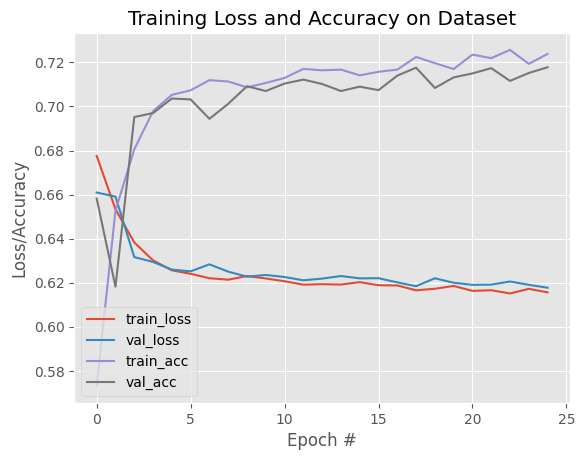

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_loss"], label="train_loss")
plt.plot(H["val_loss"], label="val_loss")
plt.plot(H["train_acc"], label="train_acc")
plt.plot(H["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


In [ ]:
from sklearn.metrics import roc_curve, auc
def Calulate_Metricas_Validacion(df_iter, modelo):
  validloader = torch.utils.data.DataLoader(df_iter, shuffle=True)
  loss_fn = nn.CrossEntropyLoss()
  TotalLossBatch = 0
  TotalAcc = 0
  ContadorLoss = 0
  ContadorAcc = 0
  probabilidades = []
  valores_reales = []
  for input, label in validloader:
    input_new = input[0]
    label_new = label[0]
    y_pred = modelo(input_new)
    loss = loss_fn(y_pred, label_new)
    TotalLossBatch +=loss
    y_pred_round = torch.round(y_pred, decimals=0)
    i=0
    for y_real in label_new:
      y_pred_ = y_pred_round[i]
      prob_value = float(y_pred[i][1].cpu().detach().numpy())
      valor_real = float(label_new[i][1].cpu().detach().numpy())
      probabilidades.append(prob_value)
      valores_reales.append(valor_real)
      if torch.equal(y_pred_, y_real):
        TotalAcc += 1
      i +=1
      ContadorAcc +=1
    ContadorLoss +=1
  fpr,tpr,_ = roc_curve(valores_reales,probabilidades)
  CanElementos = ContadorAcc
  Accuracy = TotalAcc/ContadorAcc
  LossValue =  float((TotalLossBatch/ContadorLoss).cpu().detach().numpy())
  roc_auc = auc(fpr,tpr)
  return probabilidades, Accuracy, LossValue,  roc_auc

In [ ]:
# Validation model
model_rama1 = CNNModel_Rama1()
model_rama2 = CNNModel_Rama2()
modelo_final_entrenado = Combined_model(model_rama1,model_rama2)
modelo_final_entrenado.load_state_dict(torch.load("modelo_.pth"))
modelo_final_entrenado.eval()
probabilidades_train, Accuracy_train, LossValue_train,  auc_train = Calulate_Metricas_Validacion(train_iter, modelo_final_entrenado)
probabilidades_test, Accuracy_test, LossValue_test,  auc_test = Calulate_Metricas_Validacion(test_iter, modelo_final_entrenado)
probabilidades_valid, Accuracy_valid, LossValue_valid,  auc_valid = Calulate_Metricas_Validacion(valid_iter, modelo_final_entrenado)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [ ]:
print("Train Accuracy:",Accuracy_train)
print("Train AUC:",auc_train)
print("Train Loss:",LossValue_train)
print("===================================")
print("Test Accuracy:",Accuracy_test)
print("Test AUC:",auc_test)
print("Test Loss:",LossValue_test)
print("===================================")
print("Valid Accuracy:",Accuracy_valid)
print("Valid AUC:",auc_valid)
print("Valid Loss:",LossValue_valid)


Train Accuracy: 0.7306666666666667
Train AUC: 0.7568075555207832
Train Loss: 0.6126566529273987
Test Accuracy: 0.7266
Test AUC: 0.7613511920550267
Test Loss: 0.6139175295829773
Valid Accuracy: 0.7206
Valid AUC: 0.7482705191066155
Valid Loss: 0.6175881028175354


<a id="section5"></a>
# <font color="#004D7F" size=6> 6. Modelling with CNN with tensorflow</font>

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

Now we can start the CNN training. Before that we prepare the algorithm for reading data.

<a id="section51"></a>
# <font color="#004D7F" size=5> 6.1. CNN</font>

This is an example of a simple CNN. Note that we are not looking for the optimization of the CNN but to show an example of TINTOlib execution.

In [ ]:
!pip install plot_model
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 854.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=1ed6fc53dbc8d7337e855b9938327da01555ff67d4cf6f4aa0aff80be2b86233
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
from keras.models import Sequential
#from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D
from keras.layers import  BatchNormalization, Activation, Input, Concatenate
import plot_model, np_utils

dropout = 0.5
epochs = 25
n_class = df['class'].value_counts().count()

In [ ]:
#Entrada
input_shape = Input(shape=(pixels, pixels,3))

#Inicio de rama 1
tower_1 = Conv2D(16, (3,3), activation='relu',padding="same")(input_shape)
tower_1 = BatchNormalization()(tower_1)
tower_1 = Activation('relu')(tower_1)
tower_1 = MaxPooling2D(2,2)(tower_1)
#tower_1 = Dropou(0.5)(tower_1)

tower_1 = Conv2D(32, (3,3), activation='relu',padding="same")(tower_1)
tower_1 = BatchNormalization()(tower_1)
tower_1 = Activation('relu')(tower_1)
tower_1 = MaxPooling2D(2,2)(tower_1)
#tower_1 = Dropou(0.5)(tower_1)

tower_1 = Conv2D(64, (3,3), activation='relu',padding="same")(tower_1)
tower_1 = BatchNormalization()(tower_1)
tower_1 = Activation('relu')(tower_1)
tower_1 = MaxPooling2D(2,2)(tower_1)
#tower_1 = Dropou(0.5)(tower_1)

tower_1 = Conv2D(64, (3,3), activation='relu',padding="same")(tower_1)
tower_1 = BatchNormalization()(tower_1)
tower_1 = Activation('relu')(tower_1)
tower_1 = MaxPooling2D(2,2)(tower_1)
#tower_1 = Dropou(0.5)(tower_1)
#Fin de rama 1

#Inicio de rama 2
tower_2 = Conv2D(16, (5,5), activation='relu',padding="same")(input_shape)
tower_2 = BatchNormalization()(tower_2)
tower_2 = Activation('relu')(tower_2)
tower_2 = AveragePooling2D(2,2)(tower_2)
#tower_2 = Dropou(0.5)(tower_2)

tower_2 = Conv2D(32, (5,5), activation='relu',padding="same")(tower_2)
tower_2 = BatchNormalization()(tower_2)
tower_2 = Activation('relu')(tower_2)
tower_2 = AveragePooling2D(2,2)(tower_2)
#tower_2 = Dropou(0.5)(tower_2)

tower_2 = Conv2D(64, (5,5), activation='relu',padding="same")(tower_2)
tower_2 = BatchNormalization()(tower_2)
tower_2 = Activation('relu')(tower_2)
tower_2 = AveragePooling2D(2,2)(tower_2)
#tower_2 = Dropou(0.5)(tower_2)

tower_2 = Conv2D(64, (5,5), activation='relu',padding="same")(tower_2)
tower_2 = BatchNormalization()(tower_2)
tower_2 = Activation('relu')(tower_2)
tower_2 = AveragePooling2D(2,2)(tower_2)
#tower_2 = Dropou(0.5)(tower_2)
#Fin de rama 2

#Concatenación de las 2 ramas
merged = Concatenate(axis=1)([tower_1, tower_2])

#Aplanamiento
merged = Flatten()(merged)

#Capas adicionales
out = Dense(256, activation='relu')(merged)
out = Dense(128, activation='sigmoid')(out)
out = Dense(64, activation='sigmoid')(out)
out = Dense(32, activation='sigmoid')(out)

#Capa final de clasificación
out = Dense(n_class, activation='softmax')(out)

model = Model(input_shape, out)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 30, 30, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 30, 30, 16)           448       ['input_1[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 30, 30, 16)           1216      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 30, 30, 16)           64        ['conv2d[0][0]']              
 Normalization)                                                                               

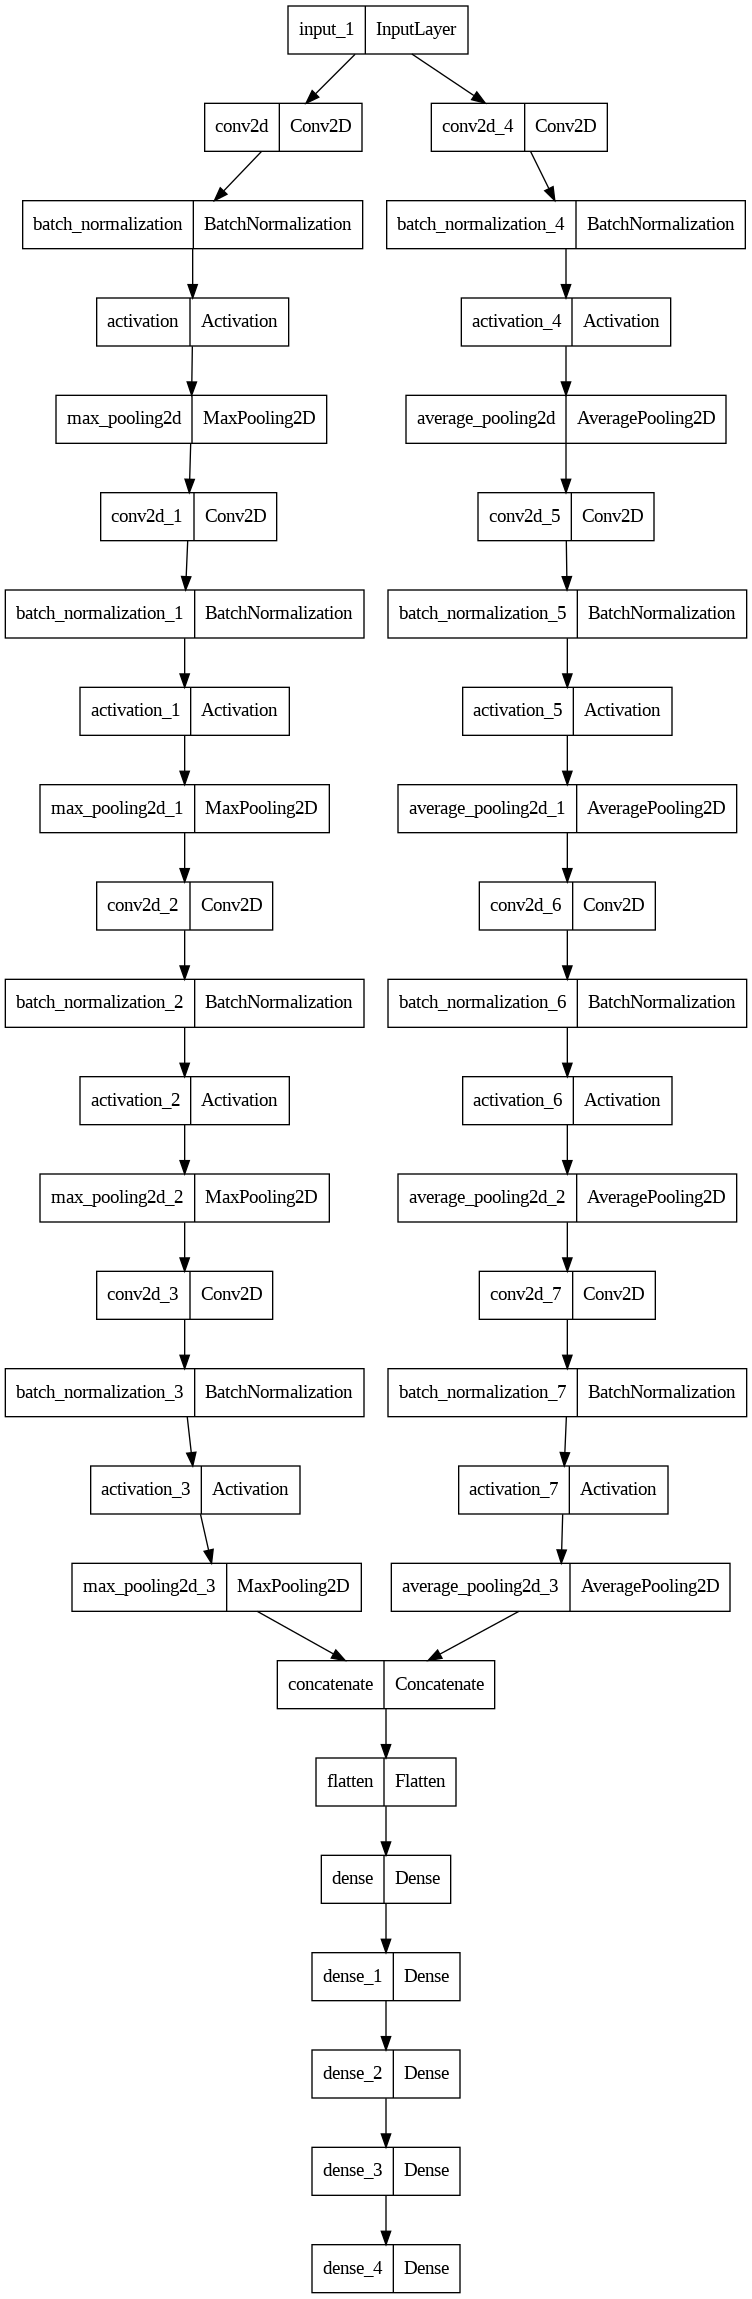

In [ ]:
from keras.utils import plot_model
model.summary()
plot_model(model)

In [ ]:
METRICS = [
      tf.keras.metrics.TruePositives(name = 'tp'),
      tf.keras.metrics.FalsePositives(name = 'fp'),
      tf.keras.metrics.TrueNegatives(name = 'tn'),
      tf.keras.metrics.FalseNegatives(name = 'fn'),
      tf.keras.metrics.BinaryAccuracy(name ='accuracy'),
      tf.keras.metrics.Precision(name = 'precision'),
      tf.keras.metrics.Recall(name = 'recall'),
      tf.keras.metrics.AUC(name = 'auc'),
]

<a id="section52"></a>
# <font color="#004D7F" size=5> 6.2. Compile and fit</font>

Note to **specify the loss** depending on whether you have a binary or multiclass classification problem.

In [ ]:
#opt = Adam(learning_rate=1e-3)
model.compile(
                #optimizer = sgd,
                optimizer = 'adam',
                #optimizer = 'Adadelta',
                #optimizer = 'Adamax',
                #optimizer = opt,
                metrics = METRICS,
                #metrics = ['accuracy'],

                #loss = 'binary_crossentropy'
                loss = 'categorical_crossentropy'
                )

In [ ]:
modelfitprogress = model.fit(
                              train_iter,
                              validation_data = valid_iter,
                              epochs = epochs,
                              steps_per_epoch = df_train.shape[0]//train_iter.batch_size,
                              validation_steps = df_val.shape[0]//valid_iter.batch_size
                              )

Epoch 1/25
150/150 [==============================] - 66s 406ms/step - loss: 0.6073 - tp: 10276.0000 - fp: 4724.0000 - tn: 10276.0000 - fn: 4724.0000 - accuracy: 0.6851 - precision: 0.6851 - recall: 0.6851 - auc: 0.7326 - val_loss: 0.6926 - val_tp: 2393.0000 - val_fp: 2607.0000 - val_tn: 2393.0000 - val_fn: 2607.0000 - val_accuracy: 0.4786 - val_precision: 0.4786 - val_recall: 0.4786 - val_auc: 0.5075
Epoch 2/25
150/150 [==============================] - 75s 502ms/step - loss: 0.5552 - tp: 11229.0000 - fp: 3771.0000 - tn: 11229.0000 - fn: 3771.0000 - accuracy: 0.7486 - precision: 0.7486 - recall: 0.7486 - auc: 0.7765 - val_loss: 0.6587 - val_tp: 2982.0000 - val_fp: 2018.0000 - val_tn: 2982.0000 - val_fn: 2018.0000 - val_accuracy: 0.5964 - val_precision: 0.5964 - val_recall: 0.5964 - val_auc: 0.6535
Epoch 3/25
150/150 [==============================] - 64s 423ms/step - loss: 0.5472 - tp: 11325.0000 - fp: 3675.0000 - tn: 11325.0000 - fn: 3675.0000 - accuracy: 0.7550 - precision: 0.7550 -

<a id="section6"></a>
# <font color="#004D7F" size=6> 7. Results</font>

Finally, we can evaluate our CNN with the images created by TINTOlib in any of the ways represented below.

---
<a id="section61"></a>
# <font color="#004D7F" size=5> 7.1. Train/Validation representation</font>

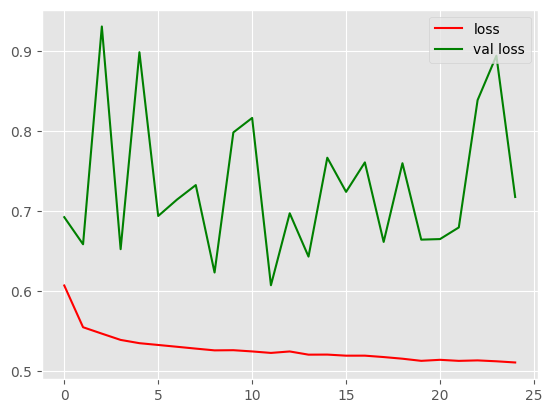

In [ ]:
plt.plot(modelfitprogress.history['loss'], color = 'red', label = 'loss')
plt.plot(modelfitprogress.history['val_loss'], color = 'green', label = 'val loss')
plt.legend(loc = 'upper right')
#plt.ylim(0,1)
plt.show()

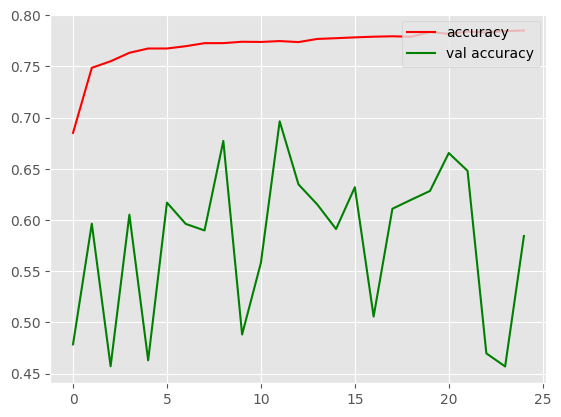

In [ ]:
plt.plot(modelfitprogress.history['accuracy'], color = 'red', label = 'accuracy')
plt.plot(modelfitprogress.history['val_accuracy'], color = 'green', label = 'val accuracy')
plt.legend(loc = 'upper right')

plt.show()

---
<a id="section62"></a>
# <font color="#004D7F" size=5> 7.2. Validation/Test evaluation</font>

In [ ]:
score = model.evaluate(valid_iter, steps = df_val.shape[0]//valid_iter.batch_size)
print("Loss in validation: {} \nAccuracy in validation: {}".format(score[0], score[5]))

50/50 [==============================] - 7s 138ms/step - loss: 0.7177 - tp: 2922.0000 - fp: 2078.0000 - tn: 2922.0000 - fn: 2078.0000 - accuracy: 0.5844 - precision: 0.5844 - recall: 0.5844 - auc: 0.6135
Loss in validation: 0.7177382111549377 
Accuracy in validation: 0.5843999981880188


In [ ]:
score_test = model.evaluate(test_iter, steps = df_test.shape[0]//test_iter.batch_size)
print("Loss in test: {} \nAccuracy in test: {}".format(score_test[0], score_test[5]))

50/50 [==============================] - 5s 107ms/step - loss: 0.7256 - tp: 2846.0000 - fp: 2154.0000 - tn: 2846.0000 - fn: 2154.0000 - accuracy: 0.5692 - precision: 0.5692 - recall: 0.5692 - auc: 0.6037
Loss in test: 0.7255741953849792 
Accuracy in test: 0.5691999793052673


In [ ]:
score_test[6]

0.5691999793052673

In [ ]:
#test_images = next(test_iter)[0]
prediction = model.predict(test_iter, steps = np.math.ceil(test_iter.samples/test_iter.batch_size))
#prediction = model.predict(test_images)
print(prediction)

<ipython-input-72-a75d43213a33>:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  prediction = model.predict(test_iter, steps = np.math.ceil(test_iter.samples/test_iter.batch_size))


50/50 [==============================] - 7s 136ms/step
[[0.3209712  0.6790288 ]
 [0.5109736  0.4890264 ]
 [0.5881685  0.4118316 ]
 ...
 [0.1832484  0.8167516 ]
 [0.1892185  0.8107815 ]
 [0.76562035 0.23437965]]


<a id="section62"></a>
# <font color="#004D7F" size=5> 7.3. Sklearn metrics evaluation</font>

In [ ]:
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score, recall_score

test_accuracy = score_test[5]
test_auc = score_test[8]
test_precision = score_test[6]
test_recall = score_test[7]

print("Test accuracy:",test_accuracy)
print("Test AUC:",test_auc)
print("Test precision:",test_precision)
print("Test recall:",test_recall)

Test accuracy: 0.5691999793052673
Test AUC: 0.6036971807479858
Test precision: 0.5691999793052673
Test recall: 0.5691999793052673


In [ ]:
train_accuracy = modelfitprogress.history["accuracy"][-1]
train_auc = modelfitprogress.history["auc"][-1]
train_precision = modelfitprogress.history["precision"][-1]
train_recall = modelfitprogress.history["recall"][-1]
train_loss = modelfitprogress.history["loss"][-1]

print("Train accuracy:",train_accuracy)
print("Train AUC:",train_auc)
print("Train precision:",train_precision)
print("Train recall:",train_recall)
print("Train loss:",train_loss)

Train accuracy: 0.7850666642189026
Train AUC: 0.8058290481567383
Train precision: 0.7850666642189026
Train recall: 0.7850666642189026
Train loss: 0.5111415982246399


In [ ]:
validation_accuracy = modelfitprogress.history["val_accuracy"][-1]
validation_auc = modelfitprogress.history["val_auc"][-1]
validation_precision = modelfitprogress.history["val_precision"][-1]
validation_recall = modelfitprogress.history["val_recall"][-1]
validation_loss = modelfitprogress.history["val_loss"][-1]

print("Validation accuracy:",validation_accuracy)
print("Validation AUC:",validation_auc)
print("Validation precision:",validation_precision)
print("Validation recall:",validation_recall)
print("Validation loss:",validation_loss)

Validation accuracy: 0.5843999981880188
Validation AUC: 0.6134510040283203
Validation precision: 0.5843999981880188
Validation recall: 0.5843999981880188
Validation loss: 0.7177382111549377


<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>